# Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import data
Import red wine data, white wine data

In [2]:
red_df = pd.read_csv("Data/winequality-red.csv")
white_df = pd.read_csv("Data/winequality-white.csv")

In [3]:
red_X = red_df.drop(columns="quality")
red_y = red_df["quality"].values.reshape(-1, 1)

white_X = white_df.drop(columns="quality")
white_y = white_df["quality"].values.reshape(-1, 1)

# Train test split

Stratify training data to ensure training data and test data will include equal distribution of all quality scores

In [4]:
from sklearn.model_selection import train_test_split

redX_train, redX_test, redy_train, redy_test = train_test_split(red_X, red_y, stratify=red_y, random_state=42)
whiteX_train, whiteX_test, whitey_train, whitey_test = train_test_split(white_X, white_y, stratify=white_y, random_state=42)

In [5]:
# ensure count of quality scores reflect distribution of quality scores in data

number_list = np.array(redy_train)
# number_list = np.array(whitey_train)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  3,   8],
       [  4,  40],
       [  5, 511],
       [  6, 478],
       [  7, 149],
       [  8,  13]])

# Scale data

function to scale using MinMaxScaler or StandardScaler

In [6]:
def scaleData(XTrain, scaler):
    if (scaler == "MinMaxScaler"):
        mm_scaler = MinMaxScaler().fit(XTrain)
        return mm_scaler
    
    elif (scaler == "StandardScaler"):
        ss_scaler = StandardScaler().fit(XTrain)
        return ss_scaler
    
    else:
        print ("Choose MinMaxScaler or StandardScaler")

In [7]:
# choose type of scaler

scaler = "MinMaxScaler"
# scaler = "StandardScaler"

X_red_scaler = scaleData(redX_train, scaler)

redX_train = X_red_scaler.transform(redX_train)
redX_test = X_red_scaler.transform(redX_test)

X_white_scaler = scaleData(whiteX_train, scaler)

whiteX_train = X_white_scaler.transform(whiteX_train)
whiteX_test = X_white_scaler.transform(whiteX_test)

# SVM Model on red wine data

In [8]:
from sklearn.svm import SVC 

red_model = SVC(kernel='linear')
red_model.fit(redX_train, redy_train.ravel())

SVC(kernel='linear')

# Accuracy of SVM Model on red wine data

In [9]:
# Support Vector Model Accuracy
print('Test Accuracy on red %.3f' % red_model.score(redX_test, redy_test))

Test Accuracy on red 0.578


# SVM Model on white wine data

In [10]:
white_model = SVC(kernel='linear')
# white_model.fit(whiteX_train, whitey_train.ravel())
white_model.fit(whiteX_train, whitey_train.ravel())

SVC(kernel='linear')

# Accuracy of SVM Model on white wine data

In [11]:
print('Test Accuracy on white %.3f' % white_model.score(whiteX_test, whitey_test))

Test Accuracy on white 0.512


# Classification Report on red wine data

In [12]:
red_quality_scores = ["Quality 3", "Quality 4", "Quality 5", "Quality 6", "Quality 7", "Quality 8"]

In [13]:
from sklearn.metrics import classification_report

# Calculate classification report for red

predictions = red_model.predict(redX_test)
print(classification_report(redy_test, predictions,
                            target_names=red_quality_scores))

              precision    recall  f1-score   support

   Quality 3       0.00      0.00      0.00         2
   Quality 4       0.00      0.00      0.00        13
   Quality 5       0.64      0.78      0.70       170
   Quality 6       0.51      0.61      0.56       160
   Quality 7       0.00      0.00      0.00        50
   Quality 8       0.00      0.00      0.00         5

    accuracy                           0.58       400
   macro avg       0.19      0.23      0.21       400
weighted avg       0.48      0.58      0.52       400



/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification Report on white wine data

In [14]:
white_quality_scores = ["Quality 3", "Quality 4", "Quality 5", "Quality 6", "Quality 7", "Quality 8", "Quality 9"]

In [15]:
# Calculate classification report for white

predictions = white_model.predict(whiteX_test)
print(classification_report(whitey_test, predictions,
                            target_names=white_quality_scores))

              precision    recall  f1-score   support

   Quality 3       0.00      0.00      0.00         5
   Quality 4       0.00      0.00      0.00        41
   Quality 5       0.57      0.47      0.51       364
   Quality 6       0.49      0.83      0.62       550
   Quality 7       0.00      0.00      0.00       220
   Quality 8       0.00      0.00      0.00        44
   Quality 9       0.00      0.00      0.00         1

    accuracy                           0.51      1225
   macro avg       0.15      0.19      0.16      1225
weighted avg       0.39      0.51      0.43      1225



/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Grid Search Parameter for red wine data

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [3, 4, 5, 6, 7]}

red_grid = GridSearchCV(red_model, param_grid, verbose=3)

In [17]:
red_grid.fit(redX_train, redy_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ............................................C=3; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 2/5] END ............................................C=3; total time=   0.0s
[CV 3/5] END ............................................C=3; total time=   0.0s
[CV 4/5] END ............................................C=3; total time=   0.0s
[CV 5/5] END ............................................C=3; total time=   0.0s
[CV 1/5] END ............................................C=4; total time=   0.0s
[CV 2/5] END ............................................C=4; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ............................................C=4; total time=   0.0s
[CV 4/5] END ............................................C=4; total time=   0.0s
[CV 5/5] END ............................................C=4; total time=   0.0s
[CV 1/5] END ............................................C=5; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 2/5] END ............................................C=5; total time=   0.0s
[CV 3/5] END ............................................C=5; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ............................................C=5; total time=   0.0s
[CV 5/5] END ............................................C=5; total time=   0.0s
[CV 1/5] END ............................................C=6; total time=   0.0s
[CV 2/5] END ............................................C=6; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 3/5] END ............................................C=6; total time=   0.0s
[CV 4/5] END ............................................C=6; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ............................................C=6; total time=   0.0s
[CV 1/5] END ............................................C=7; total time=   0.0s
[CV 2/5] END ............................................C=7; total time=   0.0s
[CV 3/5] END ............................................C=7; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END ............................................C=7; total time=   0.0s
[CV 5/5] END ............................................C=7; total time=   0.0s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(kernel='linear'), param_grid={'C': [3, 4, 5, 6, 7]},
             verbose=3)

In [18]:
print(red_grid.best_params_)

{'C': 5}


In [19]:
print(red_grid.best_score_)

0.5946617852161784


In [31]:
print(red_grid.score(redX_test,redy_test))

0.5875


In [20]:
predictions = red_grid.predict(redX_test)

In [21]:

print(classification_report(redy_test, predictions,
                            target_names=red_quality_scores))

              precision    recall  f1-score   support

   Quality 3       0.00      0.00      0.00         2
   Quality 4       0.00      0.00      0.00        13
   Quality 5       0.65      0.78      0.71       170
   Quality 6       0.52      0.64      0.57       160
   Quality 7       0.00      0.00      0.00        50
   Quality 8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.20      0.24      0.21       400
weighted avg       0.48      0.59      0.53       400



/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Grid Search Parameter for white wine data

In [22]:
param_grid = {'C': [3, 4, 5, 6, 7]}

white_grid = GridSearchCV(white_model, param_grid, verbose=3)

In [23]:
white_grid.fit(whiteX_train, whitey_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ............................................C=3; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ............................................C=3; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ............................................C=3; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ............................................C=3; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ............................................C=3; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ............................................C=4; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ............................................C=4; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ............................................C=4; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ............................................C=4; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ............................................C=4; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ............................................C=5; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ............................................C=5; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ............................................C=5; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ............................................C=5; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ............................................C=5; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ............................................C=6; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ............................................C=6; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ............................................C=6; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ............................................C=6; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ............................................C=6; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ............................................C=7; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ............................................C=7; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ............................................C=7; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ............................................C=7; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ............................................C=7; total time=   0.4s


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(kernel='linear'), param_grid={'C': [3, 4, 5, 6, 7]},
             verbose=3)

In [24]:
print(white_grid.best_params_)

{'C': 3}


In [25]:
print(white_grid.best_score_)

0.5232764277373074


In [32]:
print(white_grid.score(whiteX_test,whitey_test))

0.5142857142857142


In [26]:
predictions = white_grid.predict(whiteX_test)

print(classification_report(whitey_test, predictions,
                            target_names=white_quality_scores))

              precision    recall  f1-score   support

   Quality 3       0.00      0.00      0.00         5
   Quality 4       0.00      0.00      0.00        41
   Quality 5       0.57      0.48      0.52       364
   Quality 6       0.50      0.83      0.62       550
   Quality 7       0.00      0.00      0.00       220
   Quality 8       0.00      0.00      0.00        44
   Quality 9       0.00      0.00      0.00         1

    accuracy                           0.51      1225
   macro avg       0.15      0.19      0.16      1225
weighted avg       0.39      0.51      0.43      1225



/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

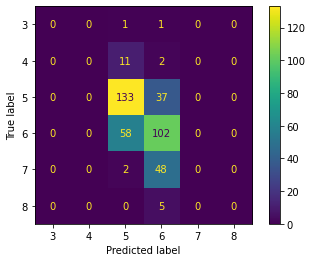

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

red_predictions = red_grid.predict(redX_test)

cm = confusion_matrix(redy_test, red_predictions, labels=red_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=red_grid.classes_)
disp.plot()


plt.savefig("model_figures/SVM_conf_matrix_red.png")

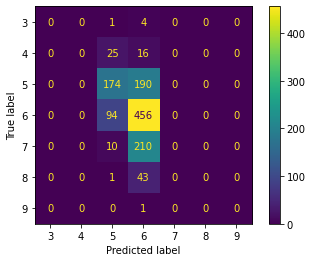

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

white_predictions = white_grid.predict(whiteX_test)

cm = confusion_matrix(whitey_test, white_predictions, labels=white_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=white_grid.classes_)
disp.plot()

# plt.show()
plt.savefig("model_figures/SVM_conf_matrix_white.png")

In [29]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# sns.heatmap(confusion_matrix(redy_test, red_model.predict(redX_test)), annot = True, fmt="d")

In [30]:
sorted(zip(rf_white.feature_importances_, list(white_features.columns)), reverse=True)

NameError: name 'rf_white' is not defined

Combine red and white data to make dataset with all wine data  

In [ ]:
red_df['type'] = pd.Series(["red" for x in range(len(red_df.index))])
red_df.head()
white_df['type'] = pd.Series(["white" for x in range(len(white_df.index))])
white_df.head()

In [ ]:
redwhite_df = pd.concat([red_df, white_df])
redwhite_df.to_csv("red_white_data.csv")